In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.05.14']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
810,Afghanistan,22.05.14,179242
1632,Africa,22.05.14,11785527
2442,Albania,22.05.14,275574
3252,Algeria,22.05.14,265816
4056,Andorra,22.05.14,42156
...,...,...,...
182950,Wallis and Futuna,22.05.14,454
183795,World,22.05.14,521127460
184560,Yemen,22.05.14,11819
185348,Zambia,22.05.14,320591


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
810,Afghanistan,22.05.14,179242
2442,Albania,22.05.14,275574
3252,Algeria,22.05.14,265816
4056,Andorra,22.05.14,42156
4842,Angola,22.05.14,99287
...,...,...,...
182377,Vietnam,22.05.14,10695036
182950,Wallis and Futuna,22.05.14,454
184560,Yemen,22.05.14,11819
185348,Zambia,22.05.14,320591


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
176187,United States,22.05.14,82437716
78009,India,22.05.14,43121599
24142,Brazil,22.05.14,30682094
59855,France,22.05.14,29215091
63877,Germany,22.05.14,25729848
175343,United Kingdom,22.05.14,22255282
139108,Russia,22.05.14,17989065
156408,South Korea,22.05.14,17782061
84510,Italy,22.05.14,17030147
170589,Turkey,22.05.14,15053168


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
158012,Spain,22.05.14,12127122
182377,Vietnam,22.05.14,10695036
7278,Argentina,22.05.14,9101319
86149,Japan,22.05.14,8334859
118991,Netherlands,22.05.14,8161310
...,...,...,...
101366,Macao,22.05.14,82
180742,Vatican,22.05.14,29
106889,Marshall Islands,22.05.14,17
109813,Micronesia (country),22.05.14,7


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.05.14', df_etc['확진자'].sum()]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [8]:
df_top

,일자,확진자
국가,,
United States,22.05.14,82437716
India,22.05.14,43121599
Brazil,22.05.14,30682094
France,22.05.14,29215091
Germany,22.05.14,25729848
United Kingdom,22.05.14,22255282
Russia,22.05.14,17989065
South Korea,22.05.14,17782061
Italy,22.05.14,17030147


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.05.14,82437716
1,India,22.05.14,43121599
2,Brazil,22.05.14,30682094
3,France,22.05.14,29215091
4,Germany,22.05.14,25729848
5,United Kingdom,22.05.14,22255282
6,Russia,22.05.14,17989065
7,South Korea,22.05.14,17782061
8,Italy,22.05.14,17030147
9,Turkey,22.05.14,15053168


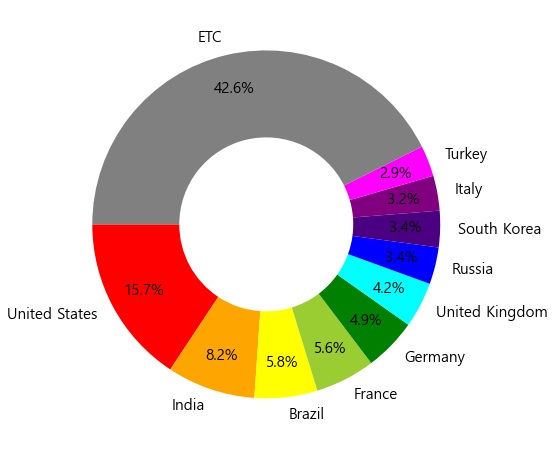

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()